In [1]:
from __future__ import print_function
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
bool_cmap = colors.ListedColormap([(1, 1, 1, 0), 'black'])
from fastadjust.simion import pa2fa
from fastadjust.io import h5write

In [3]:
# fast-adjust PA files
dire = r"C:\Users\Adam\Documents\Inventor\NO_beam\detector\SIMION"
fils = [os.path.join(dire, fil) for fil in ['electrode_.PA1', 'electrode_.PA2', 'electrode_.PA3']]

In [4]:
# 3D data
fa = pa2fa(fils)
# nx ny nz
print("PA shape:", fa.shape)
# number of electrodes
print("electrodes:", fa.num_el)

PA shape: (161, 114, 118)
electrodes: 3


In [5]:
outfil = os.path.join(dire, "fast_adjust.h5")
h5write(outfil, fa)

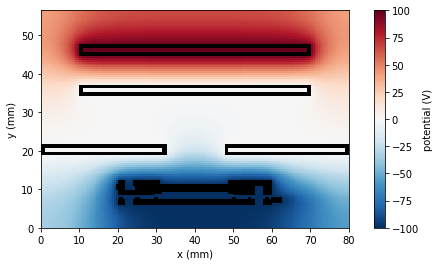

In [6]:
# z grid position
zg = 59
el = fa.electrode

# potential
voltages = np.array([0, -100, 100], dtype='float64')
phi = fa.potential(voltages)

# plot
fig, ax = plt.subplots(figsize=(9, 4))
c0 = ax.imshow(el[:, :, zg].T, origin='lower', extent=fa.extent[:4] / 1e-3, cmap=bool_cmap, vmin=0, vmax=1, zorder=10)
c1 = ax.imshow(phi[:, :, zg].T, origin='lower', extent=fa.extent[:4] / 1e-3, cmap='RdBu_r')
cbar = fig.colorbar(c1, label='potential (V)')

# format
ax.set_aspect('equal')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
plt.show()